# In Kaggle, ensure the correct files are in the input directory.

In [1]:
# import os
# print(os.listdir("../input"))

# 1. Prepare the Environment

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# Read test and train data which is already split in this data.

In [3]:
train = pd.read_csv("train.csv")
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
test = pd.read_csv("test.csv")
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['x', 'y']
Train dimensions (rows, columns): (700, 2)
Test columns:  ['x', 'y']
Test dimensions (rows, columns): (300, 2)


# Check for null values.

In [4]:
train.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
train.loc[train['y'].isnull()]

,x,y
213,3530.157369,NaN


In [6]:
train.loc[train['x'] > 99]

,x,y
158,100.000000,96.623279
212,100.000000,100.015803
213,3530.157369,NaN
237,100.000000,102.496786
269,100.000000,99.003618
298,100.000000,99.984916
508,100.000000,101.700341
632,100.000000,108.871618
676,100.000000,100.701274
685,100.000000,95.584595


# Row 213 is obviously an outlier, probably a data entry error. Let's drop it.

In [7]:
train.drop(labels=213, inplace=True)

In [8]:
train.loc[train['x'] > 99]

,x,y
158,100.0,96.623279
212,100.0,100.015803
237,100.0,102.496786
269,100.0,99.003618
298,100.0,99.984916
508,100.0,101.700341
632,100.0,108.871618
676,100.0,100.701274
685,100.0,95.584595


In [9]:
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [10]:
test.isnull().sum()

x    0
y    0
dtype: int64

# Convert to dataframes.

In [11]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [12]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [13]:
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Train columns:  ['x', 'y']
Train dimensions (rows, columns): (699, 2)
Test columns:  ['x', 'y']
Test dimensions (rows, columns): (300, 2)


# Split into X_train, y_train, X_test, and y_test.

In [14]:
X_train = train.drop(columns='y')
print("X_train:")
print(type(X_train))
print(X_train.head())
print()
y_train = train.drop(columns='x')
print("y_train")
print(type(y_train))
print(y_train.head())
print()
X_test = test.drop(columns='y')
print("X_test:")
print(type(X_test))
print(X_test.head())
print()
y_test = test.drop(columns='x')
print("y_test")
print(type(y_test))
print(y_test.head())
print()

X_train:
<class 'pandas.core.frame.DataFrame'>
      x
0  24.0
1  50.0
2  15.0
3  38.0
4  87.0

y_train
<class 'pandas.core.frame.DataFrame'>
           y
0  21.549452
1  47.464463
2  17.218656
3  36.586398
4  87.288984

X_test:
<class 'pandas.core.frame.DataFrame'>
    x
0  77
1  21
2  22
3  20
4  36

y_test
<class 'pandas.core.frame.DataFrame'>
           y
0  79.775152
1  23.177279
2  25.609262
3  17.857388
4  41.849864



In [15]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(y_test.isnull().sum())

x    0
dtype: int64
y    0
dtype: int64
x    0
dtype: int64
y    0
dtype: int64


In [16]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.70
Test Split: 0.30


# Explore the data with a Scatterplot + Density Plots

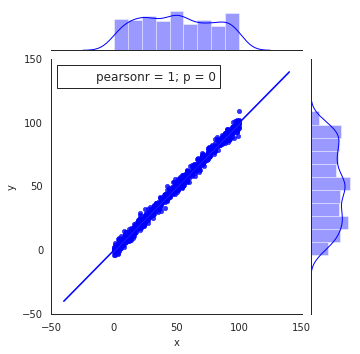

In [17]:
with sns.axes_style('white'):
    j = sns.jointplot("x", "y", data=train, kind='reg', height=5);
    j.annotate(stats.pearsonr)
plt.show()

# Histogram + Scatterplots

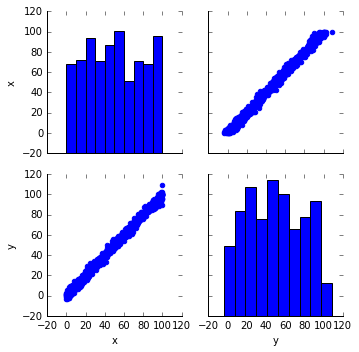

In [18]:
# This is roughly equivalent to sns.jointplot, but we see here that we have the
# flexibility to customize the type of the plots in each position.

g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# Heatmap

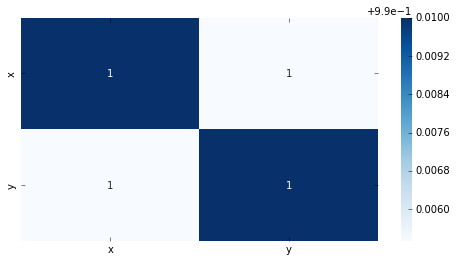

In [19]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

# Scipy: Pearson's Correlation

In [20]:
pearsonr(X_train, y_train)

TypeError: No loop matching the specified signature and casting
was found for ufunc add

# Feature selection using statsmodels.OLS (Ordinary Least Squares) -- we only have one feature in this data, but I wanted to see the results of the ols on this contrived data.

In [21]:
ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          2.955e+05
Date:                Tue, 29 Oct 2019   Prob (F-statistic):                        0.00
Time:                        22:25:52   Log-Likelihood:                         -1712.9
No. Observations:                 699   AIC:                                      3428.
Df Residuals:                     698   BIC:                                      3432.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.9990      0.002    543.615      0.000       0.995       1.003
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.246
Skew:                           0.037   Prob(JB):                        0.884
Kurtosis:                       2.945   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If the data is good for modeling, then our residuals will have certain characteristics. These characteristics are:

1. The data is “linear”. That is, the dependent variable is a linear function of independent variables and an error term e, and is largely dependent on characteristics 2-4. Think of the equation of a line in two dimensions: y = mx + b + e. yis the dependent or “response” variable, xis the input, mis the dimensional coefficient and bis the intercept (when x = 0). We can easily extend this “line” to higher dimensions by adding more inputs and coefficients, creating a hyperplane with the following form: y = a1\*x1+ a2\*x2+ … + an\*xn
2. Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.
3. There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction. 
4. The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.



Omnibus:	0.191	
Omnibus/Prob(Omnibus) – a test of the skewness and kurtosis of the residual. (Errors are normally distributed across the data. In other words, if you plotted the errors on a graph, they should take on the traditional bell-curve or Gaussian shape.) We hope to see a value close to *zero* which would indicate normalcy. 

Prob(Omnibus):	0.909
The Prob (Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. We hope to see something *close to 1* here. 

In this case Omnibus is close to zero and the Prob (Omnibus) is 
close to one. A linear regression approach will very likely yield good results.

Skew:	0.037
Skew – a measure of data symmetry. We want to see something close to *zero*, indicating the residual distribution is normal. Note that this value also drives the Omnibus. This result has close to zero, and therefore a good, skew.

Kurtosis:	2.945	
Kurtosis – a measure of “peakiness”, or curvature of the data. Higher peaks lead to greater Kurtosis. Greater Kurtosis can be interpreted as a tighter clustering of residuals around zero, implying a better model with few outliers. 

Durbin-Watson:	1.967
Durbin-Watson – tests for homoscedasticity. (There is “homoscedasticity”. This means that the variance of the errors is consistent across the entire dataset. We want to avoid situations where the error rate grows in a particular direction.). We hope to have a value *between 1 and 2*. In this case, the data yields a value of under 2.

Jarque-Bera (JB):	0.246
Jarque-Bera (JB)/Prob(JB) – like the Omnibus test in that it tests both skew and kurtosis. We hope to see in this test a confirmation of the Omnibus test. In this case, we do since the Omnibus test yielded 0.191 

Cond. No.	1.00
Condition Number – This test measures the sensitivity of a function’s output as compared to its input. (The independent variables are actually independent and not collinear. We want to ensure independence between all of our inputs, otherwise our inputs will affect each other, instead of our response.) When we have multicollinearity, we can expect much higher fluctuations to small changes in the data, hence, we hope to see a relatively small number, something *below 30*. We only have one feature in this data, so we are not surprised to see a 1.00 here.

# Linear Regression Model:

In [22]:
# Create linear regression objects
lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [23]:
lm1.fit(X_train[['x']], y_train)
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[-0.10726546]
[[1.00065638]]


In [24]:
print('Univariate - y = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

Univariate - y = b + m * exam1
    y-intercept (b): -0.11
    coefficient (m): 1.00



# Now that we have a model, let's make predictions.

In [25]:
y_pred_lm1 = lm1.predict(X_train[['x']])

In [26]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1)) 

lm1
  mse: 7.87


In [27]:
r2_lm1 = r2_score(y_train, y_pred_lm1)

print('  {:.2%} of the variance in the y can be explained by x.'.format(r2_lm1))

  99.07% of the variance in the y can be explained by x.


Text(0, 0.5, 'Residuals')

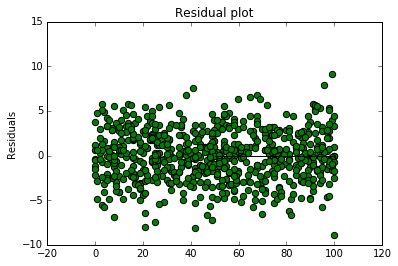

In [28]:
plt.scatter(y_pred_lm1, y_pred_lm1 - y_train, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

# Now try on test data.

In [29]:
# Make predictions using the testing set
y_pred_test = lm1.predict(X_test[['x']])

In [30]:
mse = mean_squared_error(y_test, y_pred_test)

print("Mean squared error: %.2f" % mse)

Mean squared error: 9.43


In [31]:
r2 = r2_score(y_test, y_pred_test)

print('{:.2%} of the variance in y can be explained by x.'
      .format(r2))

98.88% of the variance in y can be explained by x.


Text(0, 0.5, 'Residuals')

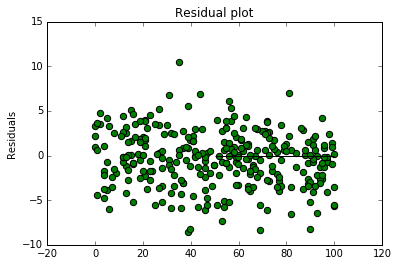

In [32]:
plt.scatter(y_pred_test, y_pred_test - y_test, c='g', s=40)
plt.hlines(y=0, xmin=50, xmax=100)
plt.title("Residual plot")
plt.ylabel('Residuals')

# This is model is a good fit for this data.